In [5]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
np.random.seed(0)

data = np.genfromtxt('data/curve80.txt', delimiter = None)
x = data[:,0]
y = data[:,1]

x = np.atleast_2d(x).T

xtr, xte, ytr, yte = ml.splitData(x, y, 0.75);

print("xtr's shape:", xtr.shape, "xte's shape:", xte.shape, 
      "\nytr's shape:", ytr.shape, "yte's shape:", yte.shape)

("xtr's shape:", (60L, 1L), "xte's shape:", (20L, 1L), "\nytr's shape:", (60L,), "yte's shape:", (20L,))


1.2a


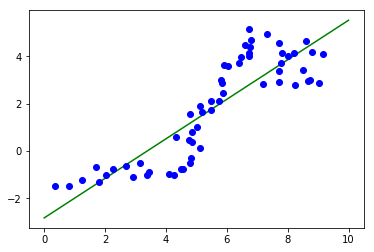

('1.2b\n lr.theta = ', array([[-2.82765049,  0.83606916]]))


In [6]:
lr = ml.linear.linearRegress(xtr,ytr)
xs = np.linspace(0, 10, 200)
xs = xs[:,np.newaxis]

ys = lr.predict(xs)
print("1.2a")
plt.plot(xs,ys,'g-', xtr,ytr,'bo')
plt.show()
print("1.2b\n lr.theta = ",lr.theta)

In [7]:
errTrain = lr.mse(xtr,ytr)
errValid = lr.mse(xte,yte)
print("1.2c\nMSE of Training Error:",errTrain,"\nMSE of Testing/Validation Error:", errValid)

('1.2c\nMSE of Training Error:', 1.1277119556093911, '\nMSE of Testing/Validation Error:', 2.2423492030101246)


The Y intercept is -3 and it is similar to lr.theta[0].

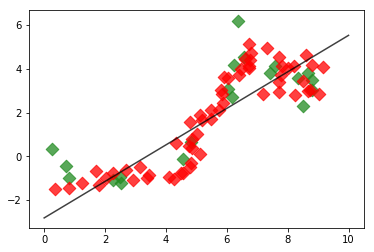

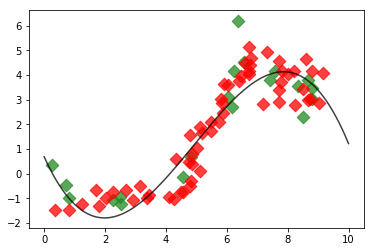

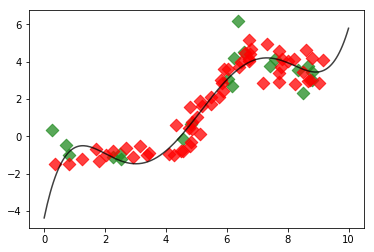

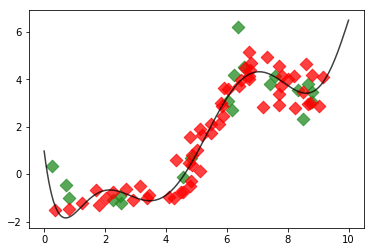

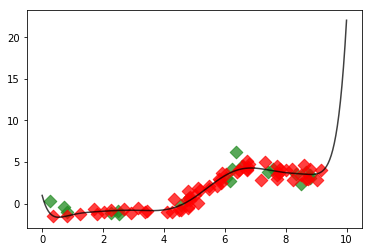

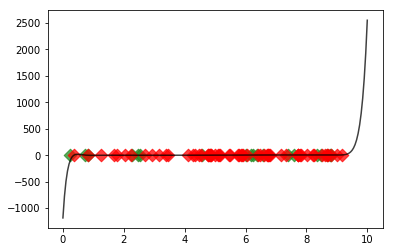

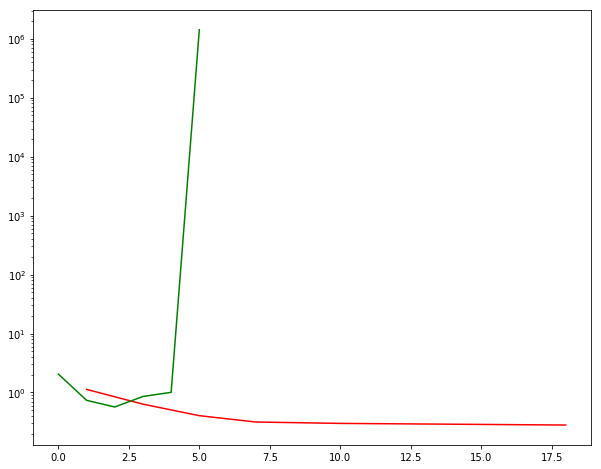

In [35]:
d = [1,3,5,7,10,18]
testArr = [0,0,0,0,0,0]
trainArr = [0,0,0,0,0,0]



def Phi(x, degree, params):
    return ml.transforms.rescale(ml.transforms.fpoly(x, degree, False), params)[0]



for i, degree in enumerate(d):
    xtrp = ml.transforms.fpoly(xtr, degree, bias=False)
    xtrp, params = ml.transforms.rescale(xtrp)
    lrTrain = ml.linear.linearRegress(xtrp, ytr)
    
    xtep = ml.transforms.fpoly(xte, degree, bias=False)
    xtep, _ = ml.transforms.rescale(xtep)
    lrTest = ml.linear.linearRegress(xtep, yte)
    
    p = ml.transforms.rescale(ml.transforms.fpoly(xs,degree,bias=False), params)[0]
    ys = lrTrain.predict(p)
    
    yhatTrain = lrTrain.predict(Phi(xtr, degree, params))
    yhatTest = lrTest.predict(Phi(xte, degree, params))
    #print(yhatTest.shape, ytr.shape, ys.shape, yte.shape)

    xtep = Phi(xte, degree, params)
    trainArr[i] = lrTrain.mse(xtrp, ytr)
    testArr[i] = lrTest.mse(xtep, yte)
    plt.scatter(xte, yte, s = 80, marker='D', color = 'forestgreen', alpha = 0.75, label = 'ytest')
    plt.scatter(xtr, ytr, s = 80, marker = 'D', color = 'red', alpha = 0.75, label = 'ytrain')
    #plt.plot(xs, ys, label = "prediction", color = 'black', lw =3, alpha = 0.75)
    plt.plot(xs, ys, "k-", alpha = 0.75)
    plt.show()
fig,ax = plt.subplots(1,1, figsize=(10,8))
ax.semilogy(d, trainArr, 'r-', testArr, 'g-')
plt.show()

1.3 I recommend degree of 3 or 5 to avoid overfitting/underfitting.

Five-Fold Cross Validation Error Plot 


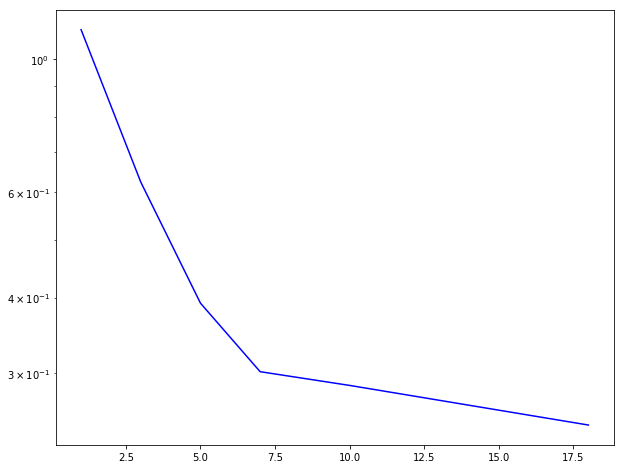

Five-Fold Cross Validation Error Plot w/ test Data and training data


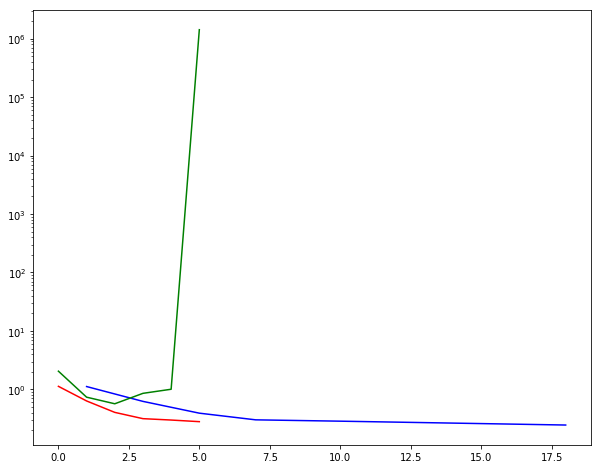

In [37]:
#f, ax = plt.subplots(2, 3, figsize=(20, 20))
#ax = ax.flatten()

folds = 5
msArr = [0,0,0,0,0,0]


def cvError(degree, fold, n, x):
    xtrp = ml.transforms.fpoly(x, degree, bias=False)
    xtrp, params = ml.transforms.rescale(xtrp)
    
    xti, xvi, yti, yvi = ml.crossValidate(xtrp, ytr, n, fold)
    learner = ml.linear.linearRegress(xti, yti)
    return learner.mse(xti,yti)


for i,degree in enumerate([1,3,5,7,10,18]):
    j = [0,0,0,0,0]
    for iFold in range(folds):
        j[iFold] = cvError(degree, iFold, folds, xtr)
    msArr[i] = np.mean(j)
fig,ay = plt.subplots(1,1, figsize=(10,8))
print("Five-Fold Cross Validation Error Plot ")
ay.semilogy(d, msArr, 'b-')
plt.show()    

fig,ay = plt.subplots(1,1, figsize=(10,8))
print("Five-Fold Cross Validation Error Plot w/ test Data and training data")
ay.semilogy(d, msArr, 'b-', testArr, 'g-', trainArr, 'r-')
plt.show()    


2.2. The graph is essentially the same and barely differ. As there are higher degrees, the MSE gets lower.

2.3. I recommend 3 degree polynomial

n-Fold Cross Validation Error Plot


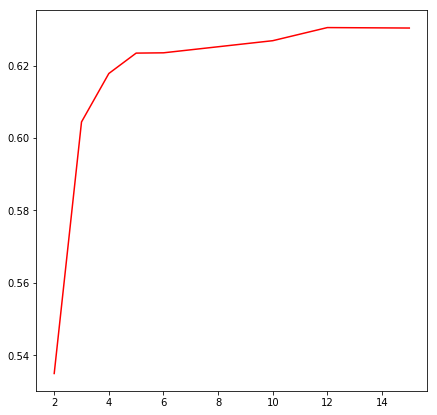

In [26]:
nFolds = [2,3,4,5,6,10,12,15]
means = [0, 0, 0, 0, 0, 0,0,0]
degree = 3

for i, fold in enumerate(nFolds):
    a = [0 for k in range(fold)]
    for j in range(fold):
        a[j] = cvError(degree, j, fold, xtr)
        
    means[i] = np.mean(a)


fig,ay = plt.subplots(1,1, figsize=(7,7))
print("n-Fold Cross Validation Error Plot")
plt.plot(nFolds, means, 'r-')
plt.show()

2.4 The Error increases as we increasee the # of folds because our sample size decreases as the # of folds gets bigger. The sample for validation is becomes too low.

# 3

This was done by Shah Masood. I looked extensively in TA's github